## EDA

In [16]:
import pandas as pd
import numpy as np

In [5]:
iphone_df=pd.read_csv("iphone_purchase_records.csv")

#### IPhone Purchase Records

In [39]:
iphone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [37]:
iphone_df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [57]:
le=LabelEncoder()
iphone_df['Gender']=le.fit_transform(iphone_df['Gender'])

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile

In [81]:
os.makedirs("iphone_graphs")

In [83]:
def save_graph(fig, name):
    fig.savefig(f"graphs/{name}.png")

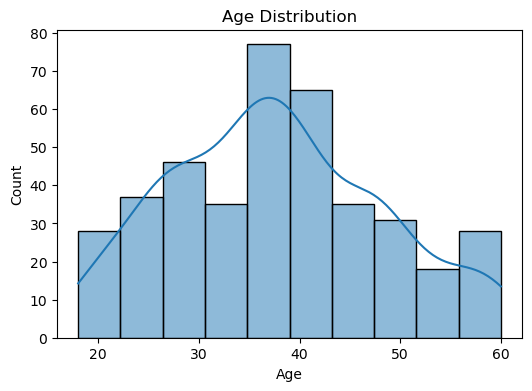

In [85]:
plt.figure(figsize=(6, 4))
sns.histplot(iphone_df['Age'], kde=True)
plt.title("Age Distribution")
save_graph(plt, "iphone_age_distribution")

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [89]:
X=iphone_df[['Gender', 'Age', 'Salary']]
y=iphone_df['Purchase Iphone']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [93]:
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred=knn_classifier.predict(X_test)

In [95]:
accuracy=accuracy_score(y_test, y_pred)
print(f"KNN Classifier Accuracy:{round(accuracy*100,2)}%")

KNN Classifier Accuracy:92.5%


In [100]:
results = pd.DataFrame({"Model":["KNN Classifier"],
                         "Accuracy":[accuracy]})
results.to_csv("iphone_model_results.csv",index=False)

In [108]:
zipf=zipfile.ZipFile("plots_iphone.zip","w",zipfile.ZIP_DEFLATED)
with zipfile.ZipFile("iphone_graphs.zip","w") as zipf:
    for file in os.listdir("iphone_graphs"):
        zipf.write(os.path.join("iphone_graphs",file))

zipf.close()

In [112]:
iphone_df.to_csv("iphone_prj5_cleaned.csv", index=False)